<a href="https://colab.research.google.com/github/CristobalSVM/Aprendizaje-Automatico/blob/main/Tarea_5_ANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea en clase (2 puntos)

### Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código.

### Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros

### **Método DBSCAN**

DBSCAN significa agrupamiento espacial basado en densidad de aplicaciones con ruido. 

Este es un buen algoritmo para encontrar esquemas en un conjunto de datos. Encuentra grupos de forma arbitraria en función de la densidad de puntos de datos en diferentes regiones. Separa las regiones por áreas de baja densidad para poder detectar valores atípicos entre los grupos de alta densidad.

**Este algoritmo es mejor que el k-means cuando se trata de trabajar con datos que tienen formas extrañas.**

DBSCAN utiliza dos parámetros para determinar cómo se definen los grupos: **min_samples** (el número mínimo de puntos de datos que deben agruparse para que un área se considere de alta densidad) y **eps** (epsilon: la distancia utilizada para determinar si un punto de datos está en la misma área que otros puntos de datos).

La elección de los parámetros iniciales adecuados es fundamental para que este algoritmo funcione.

Podría convenir aplicarlo a mis datos porque el algoritmo trabaja con datos con formas extrañas, además, por ser no supervisado, da un poco más de flexibilidad de elegir los parámetros iniciales, los cuales podrían definirse por ejemplo, min_sample = 3 por ser datos financieros, Banxico y la CNBV piden información trimestral y eps dependerá de la estrategia de negocio. En este caso, Banregio se concentra en personas físicas, personas físicas con actividad empresarial y MyPYMES, por lo que se podría decir que un eps de 0.275 MDP es una buena aproximación de acuerdo a los estados financieros.



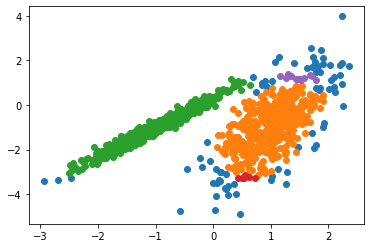

In [ ]:
# EJEMPLO

# librerías

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# inicializar el conjunto de datos con el que trabajaremos
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# definir el modelo
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# entrenar el modelo
dbscan_model.fit(training_data)

# asignar cada punto de datos a un grupo
dbscan_result = dbscan_model.fit_predict(training_data)

# obtener todos los grupos únicos
dbscan_clusters = unique(dbscan_result)

# graficar el DBSCAN de grupos
for dbscan_cluster in dbscan_clusters:
    # obtener todos los puntos de datos que caen en este grupo
    index = where(dbscan_result == dbscan_cluster)
    # hacer el gráfico
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# mostrar el gráfico DBSCAN
pyplot.show()

In [ ]:
training_data

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

### Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste y discutirla

### **Davies-Bouldin**  
\
El índice (Davies y Bouldin, 1979) evalúa los algoritmos de agrupamiento y garantiza que el mínimo del valor del índice se determina como el número óptimo de clústers (Qinpei Zhao,2009).

**Definición**\
$$
DB = \frac{1}k ∑^{k}_{i=1,i!=j} max(\frac{σᵢ+σⱼ}{d(cᵢ,cⱼ)})
$$ 

Donde k es el número de clústeres, σᵢ es la distancia promedio entre cada punto en el clúster i y el centroide del clúster, σⱼ es la distancia promedio entre cada punto del clúster j y el centroide del clúster, y d(cᵢ,cⱼ) es la distancia entre los centroides de los 2 clústeres.  
\
Valores pequeños para el índice DB indica clústeres compactos, y cuyos centros estas bien separados los unos de los otros.  
\
***
\
### **Calinski-Harabasz**  
\
(Ethen, 2015) La evaluación de Calinski Harabasz es un objeto que consiste en datos de muestra, datos de agrupación y valores de criterio de Calinski-Harabasz utilizados para evaluar el número óptimo de agrupaciones. 
   

\
**Definición** 

 $$CH = \frac{SS_B}{SS_W} \ \ X \ \ \frac{N-k}{k-1} $$
 \
Sea k el número de grupos, y N es el número total de observaciones (puntos de datos), SS$_w$ es la varianza general dentro del grupo (equivalente al total dentro de la suma de cuadrados calculada anteriormente), SS$_B$ es la varianza global entre grupos.  
 \

 Una cosa importante para usar esta medida es que a veces alcanza el nivel óptimo
en el grupo 2, sin embargo , agrupar el punto de datos en 2 grupos puede no ser ideal.  
  \
***
\
Considero que el Índice Davies-Boundin es más adecuado ya que que el índice de Calinski-Harabasz, como menciona en su último punto, alcanza el nivel óptimo de grupos de 2, por lo tanto, dependerá del investigador decidir la forma adecuada para calcular el tamaño del clúster que sea más razonable


# Tarea (8 puntos)
### Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes


In [4]:
#### IMPORTAR LAS LIBRERÍAS ####
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Importar libreria para abrir xlsx o csv.
import pandas as pd

#Acceso a google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Carga de base
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
data = pd.read_excel(bd_BR)
data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1,201612,9.748517e+10,2.922565e+10,35428115940,6.761324e+09,147,274,75627
1,2,201701,9.912669e+10,2.913157e+10,36612242954,6.610840e+09,149,283,76116
2,3,201702,9.860860e+10,2.834034e+10,37709507528,6.352306e+09,149,282,77057
3,4,201703,9.858651e+10,2.855841e+10,38137700755,6.238445e+09,149,284,78379
4,5,201704,9.731282e+10,2.946925e+10,38679704639,6.377189e+09,149,283,79406
...,...,...,...,...,...,...,...,...,...
56,57,202108,1.601921e+11,6.032032e+10,46331947444,4.434798e+09,169,351,205704
57,58,202109,1.600526e+11,6.118401e+10,45412168111,4.333770e+09,170,364,212165
58,59,202110,1.616247e+11,6.153808e+10,44615468429,4.450421e+09,157,349,219334
59,60,202111,1.643413e+11,6.303590e+10,44254716609,4.662185e+09,158,360,227138


In [19]:

 #Cambiar tipo de variable 
 convertir = {'id': int,
                'fecha': int,
                'sucursales': int,
                'cajeros': int,
                'tarjetas': int}  
  
data = data.astype(convertir)  

#Modificar columnas fecha, activo, vista, plazo, prestamos interbancarios para tener unidades de millones de pesos
data['activo'] = data['activo']/1000000 
data['vista'] = data['vista']/1000000
data['plazo'] = data['plazo']/1000000
data['prestamos interbancarios'] = data['prestamos interbancarios']/1000000


In [20]:
#Conocer la forma de los datos
data.shape

(61, 9)

In [21]:
#Nulos
data.isnull().sum()


id                          0
fecha                       0
activo                      0
vista                       0
plazo                       0
prestamos interbancarios    0
sucursales                  0
cajeros                     0
tarjetas                    0
dtype: int64

In [22]:
#Conocer el formato de los datos
data.dtypes

id                            int64
fecha                         int64
activo                      float64
vista                       float64
plazo                       float64
prestamos interbancarios    float64
sucursales                    int64
cajeros                       int64
tarjetas                      int64
dtype: object

In [23]:
### DATOS DE MUESTRA ###
#Se selecionan unos datos al azar para posteriormente verificar el clúster al que pertenecen
indices = [23, 41, 55]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)

data = data.drop(indices, axis = 0)

In [24]:
### PROCESAMIENTO DE LOS DATOS ###
#Eliminamos las columnas de id y fecha 
data = data.drop(['id', 'fecha'], axis = 1)
muestras = muestras.drop(['id', 'fecha'], axis = 1)

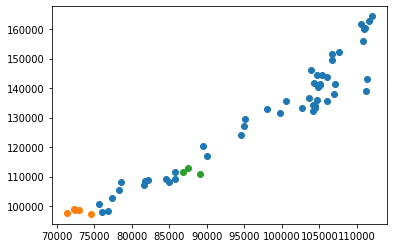

In [93]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from numpy import array


data = array(data)
# definir el modelo
dbscan_model = DBSCAN(eps=2750, min_samples=3)

# entrenar el modelo
dbscan_model.fit(data)

# asignar cada punto de datos a un grupo
dbscan_result = dbscan_model.fit_predict(data)

# obtener todos los grupos únicos
dbscan_clusters = unique(dbscan_result)

# graficar el DBSCAN de grupos
for dbscan_cluster in dbscan_clusters:
    # obtener todos los puntos de datos que caen en este grupo
    index = where(dbscan_result == dbscan_cluster)
    # hacer el gráfico
    pyplot.scatter(data[index, 1]+data[index, 2]+data[index, 3],data[index, 0])

# mostrar el gráfico DBSCAN
pyplot.savefig('dbscan.pdf')
pyplot.show()

In [26]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)


In [94]:
#Se determina las variables a evaluar
X = data_escalada

In [89]:
from sklearn.cluster import DBSCAN
#Se define el algoritmo
algoritmo = DBSCAN(eps = 0.0275, min_samples = 3)
#Se entrena el algoritmo
algoritmo.fit(X)
pred1 = algoritmo.fit_predict(X)
pred1

array([ 0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2])

In [62]:
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.fit_predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print( "Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: -1
Muestra 1 se encuentra en el clúster: -1
Muestra 2 se encuentra en el clúster: -1


### Elegir alguna métrica para determinar número de grupos, usarla y discutirla

Método del Codo

In [63]:

from sklearn.cluster import KMeans
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
df = pd.read_excel(bd_BR)



In [64]:
# Importamos dos módulos para escalado, existen más
# scale: Center to the mean and component wise scale to unit variance
# MinMaxScaler: 
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(data)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(data)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])

Escalado con scale:
[[-1.44431183 -1.12508076 -1.74940878  0.77685299 -1.24333707 -0.83856423
  -1.49392245]
 [-1.47032522 -1.20362021 -1.59563273  0.49392184 -1.24333707 -0.87574827
  -1.4716152 ]
 [-1.47143446 -1.18197339 -1.53562363  0.36931648 -1.24333707 -0.80138019
  -1.440276  ]
 [-1.53538687 -1.09156224 -1.45966454  0.5211537  -1.24333707 -0.83856423
  -1.41593004]
 [-1.4973831  -1.1054175  -1.20006907  0.29551931 -1.24333707 -0.83856423
  -1.31250121]]

Escalado con Min-Max:
[[0.02706111 0.02280499 0.0470715  0.577942   0.07692308 0.11214953
  0.00316876]
 [0.01933176 0.         0.09069003 0.51232352 0.07692308 0.10280374
  0.00926652]
 [0.01900217 0.00628545 0.1077116  0.48342456 0.07692308 0.12149533
  0.01783319]
 [0.         0.03253755 0.12925738 0.51863923 0.07692308 0.11214953
  0.02448824]
 [0.01129206 0.02851449 0.20289157 0.46630924 0.07692308 0.11214953
  0.05276084]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'SSE')

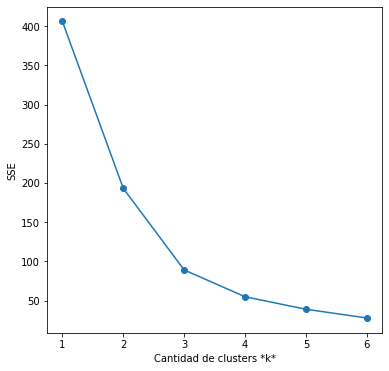

In [65]:
from sklearn.cluster import KMeans

# Corro el algoritmo con K entre 2 y 7 porque son 7 variables y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 7))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE')



In [66]:
df_inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': sse})
df_inertias

,n_clusters,inertia
0,1,406.000000
1,2,193.016547
2,3,88.997740
3,4,54.797705
4,5,38.856703
5,6,27.713431


In [67]:
from numpy import ones,vstack
from numpy.linalg import lstsq
points = [
    (df_inertias.iloc[0, :].n_clusters, df_inertias.iloc[0, :].inertia),
    (df_inertias.iloc[-1, :].n_clusters, df_inertias.iloc[-1, :].inertia)
]
x_coords, y_coords = zip(*points)
A = vstack([x_coords, ones(len(x_coords))]).T
m, b = lstsq(A, y_coords, rcond=None)[0]

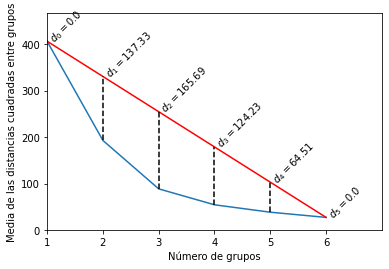

In [71]:
plt.figure()
plt.plot(df_inertias.n_clusters, df_inertias.inertia)
plt.plot(df_inertias.iloc[[0, -1], :].n_clusters, df_inertias.iloc[[0, -1], :].inertia, c='r')
for i, r in df_inertias.iterrows():
    d = '$d_{' + str(i) + '}' + f' = {abs(round(r.inertia - (m * r.n_clusters + b), 2)):,}$'
    plt.annotate(d, xytext=(r.n_clusters, m * r.n_clusters + b), xy=(r.n_clusters, m * r.n_clusters + b), rotation = 45)
    plt.plot([r.n_clusters, r.n_clusters], [r.inertia, m * r.n_clusters + b], '--k')
plt.xlabel('Número de grupos')
plt.ylabel('Media de las distancias cuadradas entre grupos')
plt.xlim((1, 7))
plt.ylim((0, 1.15 * df_inertias.inertia.max()))
plt.xticks(range(1, 7))
plt.savefig('codo.pdf')
plt.show()

Por lo tanto, el grupo de cluster sugerido por el método del codo es de 3.

### Busca alguna revista científica que publique trabajos relacionados con el tuyo

Es una página web llamada Redalyc (Red de Revistas Científicas de América Latina y el Caribe, España y Portugal) la cuál cuenta con 1,575 revistas en línea entre las que se encuentran Análisis Económico, Ciencia y Sociedad, Entramado y Estudios del Desarrollo Social entre otras.

https://www.redalyc.org/home.oa

La revista seleccionada es Entramado, ya que uno de sus articulos publicados (Medición del riesgo de liquidez. Una
aplicación en el sector cooperativo) se relaciona con los datos al hacer uso de activos y pasivos para generar la brecha de liquidez.

### Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía


### Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados
